In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('114.xls') 
years = df.iloc[:, 0].values 
data = df.iloc[:, 1:].values  

X = df[['MD', 'CSDA', 'MH', 'WFL', 'LT']]
y = df['HFWCZ']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_val = poly.transform(X_val_scaled)


model = SVR(kernel='rbf', C=100, gamma='auto')


model.fit(X_poly_train, y_train)


y_val_pred = model.predict(X_poly_val)


val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation R2: {val_r2:.4f}")


y_train_pred = model.predict(X_poly_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training R2: {train_r2:.4f}")

D:\Anaconda\Anaconda3-2020.07\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Validation MSE: 1993.6677
Validation RMSE: 44.6505
Validation MAE: 28.1516
Validation R2: 0.4676
Training MSE: 116.4140
Training RMSE: 10.7895
Training MAE: 5.1014
Training R2: 0.9020


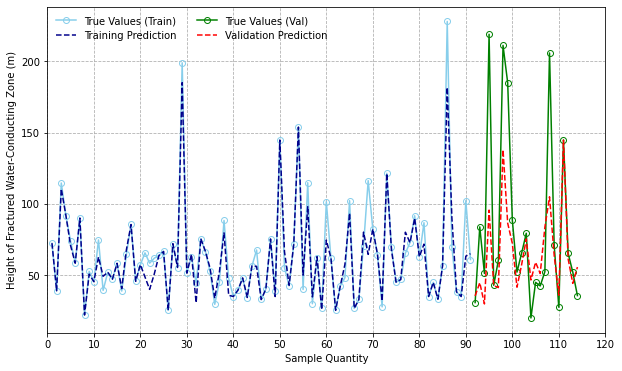

In [3]:

plt.figure(figsize=(10, 6))


y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()


train_index = np.arange(1, len(y_train_np) + 1)
plt.plot(train_index, y_train_np, 'o-', label="True Values (Train)", color='skyblue', markerfacecolor='none')
plt.plot(train_index, y_train_pred, '--', label="Training Prediction", color="#00008B")


val_index = np.arange(len(y_train_np) + 1, len(y_train_np) + len(y_val_np) + 1)
plt.plot(val_index, y_val_np, 'o-', label="True Values (Val)", color='green', markerfacecolor='none')
plt.plot(val_index, y_val_pred, '--', label="Validation Prediction", color='red')


plt.xlim([0, 120])
plt.xticks(np.arange(0, 121, 10))

plt.xlabel('Sample Quantity')
plt.ylabel('Height of Fractured Water-Conducting Zone (m)')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, ncol=2)
plt.grid(True, linestyle='--')


plt.savefig('fig/svm_model.png', dpi=300)
plt.savefig('fig/svm_model.pdf', dpi=600, format='pdf')  
plt.show()
